In [47]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [66]:
df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [49]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [67]:
df.loc[df["Market Category"].isna(), "Market Category"] = "Unknown"
df = df.dropna()
df.shape

(11812, 16)

In [79]:
from sklearn.preprocessing import MultiLabelBinarizer
# Wir erstellen aus der Spalte Marketcategory mehrere Spalten mit den Komma-Separierten Werten

mlb = MultiLabelBinarizer()
market_category_cols = mlb.fit_transform(df["Market Category"].str.split(","))
mlb.classes_

array(['Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback', 'High-Performance', 'Hybrid', 'Luxury', 'Performance',
       'Unknown'], dtype=object)

In [80]:
# Den Transformer können wirt auf die Spalte anwenden
market_category_df = pd.DataFrame(market_category_cols, columns=mlb.classes_)
market_category_df

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Unknown
0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11807,1,0,0,0,0,1,0,0,1,0,0
11808,1,0,0,0,0,1,0,0,1,0,0
11809,1,0,0,0,0,1,0,0,1,0,0
11810,1,0,0,0,0,1,0,0,1,0,0


In [83]:
# Dieses DataFrame joinen wir an das bisherige

df_inkl_market_cats = pd.concat([df, market_category_df], axis=1)
df_inkl_market_cats = df_inkl_market_cats.drop("Market Category", axis=1)
df_inkl_market_cats.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Unknown
0,BMW,1 Series M,2011.0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
df_inkl_market_cats.shape

(11914, 26)

In [87]:
# Wir entfernen die Fahzeugnamen, da diese zu vielen führen und außerdem irreführend sein könnten, wenn ein Fahrzeug nicht bekannt ist.

df_inkl_market_cats = df_inkl_market_cats.drop("Model", axis=1)

In [97]:
# Die Spalte Market Category == Unknown hat jetzt keinen Mehrwert mehr. Wir entfernen sie
df_inkl_market_cats = df_inkl_market_cats.drop("Unknown", axis=1, errors="ignore")

In [100]:
df_inkl_market_cats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 0 to 11323
Columns: 102 entries, Year to Vehicle Style_Wagon
dtypes: bool(84), float64(18)
memory usage: 2.7 MB


In [101]:
df_inkl_market_cats = pd.get_dummies(df_inkl_market_cats)

In [102]:
df_inkl_market_cats.shape

(11914, 102)

In [103]:
df_inkl_market_cats_corr = df_inkl_market_cats.corr()

In [104]:
df_inkl_market_cats_corr["MSRP"].abs().sort_values(ascending=False).head(n=30)

MSRP                                                          1.000000
Engine HP                                                     0.661827
Engine Cylinders                                              0.544002
Engine Fuel Type_premium unleaded (required)                  0.459982
Make_Bugatti                                                  0.453894
Engine Fuel Type_regular unleaded                             0.360972
Make_Lamborghini                                              0.321009
Make_Maybach                                                  0.308936
Make_Bentley                                                  0.272135
Make_Rolls-Royce                                              0.264281
Make_Ferrari                                                  0.248450
Driven_Wheels_front wheel drive                               0.239173
Make_Aston Martin                                             0.232530
Transmission Type_AUTOMATED_MANUAL                            0.229911
Year  

In [105]:
df_inkl_market_cats_corr["MSRP"].abs().sort_values(ascending=False).tail(n=30)

Make_Scion                                                       0.024450
Make_Lotus                                                       0.023560
Make_FIAT                                                        0.021572
Make_Saab                                                        0.021241
Hatchback                                                        0.021059
Engine Fuel Type_flex-fuel (unleaded/E85)                        0.020481
Vehicle Style_Passenger Van                                      0.020045
Vehicle Size_Midsize                                             0.019069
Vehicle Style_Convertible SUV                                    0.019040
Make_Lexus                                                       0.015293
Vehicle Style_Sedan                                              0.015247
Transmission Type_AUTOMATIC                                      0.014520
Make_Acura                                                       0.013893
Vehicle Style_Crew Cab Pickup         

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_inkl_market_cats_corr)
df_normalized = pd.DataFrame(df_normalized, columns=df_inkl_market_cats_corr.columns)
df_normalized.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Crossover,Diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,...,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.186415e-16,4.571507e-17,-7.619178e-18,-1.088454e-18,1.904794e-18,-4.299393e-17,-2.278950e-17,-3.918434e-17,3.605504e-17,-3.306179e-17,...,-6.530724e-18,7.347064e-18,1.197299e-17,1.360567e-17,-2.176908e-18,-2.176908e-18,7.347064e-18,-4.462661e-17,6.204187e-17,1.741526e-17
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,...,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-2.540780e+00,-2.569254e+00,-3.149300e+00,-3.143238e+00,-3.184776e+00,-3.221183e+00,-1.107018e+00,-2.254758e+00,-1.335384e+00,-6.788663e-01,...,-3.379789e+00,-8.336866e-01,-3.932160e+00,-1.551757e+00,-1.550465e+00,-1.003320e+00,-1.182764e+00,-2.415752e+00,-2.155948e+00,-1.212682e+00
25%,-3.959051e-01,-4.454025e-01,-4.159119e-01,-2.994404e-01,-4.062132e-01,-4.112578e-01,-4.199266e-01,-4.747644e-01,-3.444972e-01,-2.296090e-01,...,-4.004886e-01,-1.590831e-01,-3.876206e-01,-3.410816e-01,-3.100060e-01,-2.917966e-01,-2.376496e-01,-2.764668e-01,-3.948820e-01,-2.987459e-01
50%,-6.147662e-02,-1.342723e-01,-8.026608e-02,2.671351e-02,-7.159022e-02,-1.043096e-01,-1.383963e-01,-2.962889e-01,-1.332449e-01,-1.453613e-01,...,-1.282741e-01,-1.063051e-01,-1.130244e-01,-1.567433e-01,-1.196375e-01,-1.195024e-01,-1.391195e-01,-1.078001e-01,-1.016398e-01,-1.192080e-01
75%,2.302369e-01,3.752928e-01,3.234473e-01,2.648910e-01,2.031991e-01,1.957923e-01,1.910932e-01,1.455153e-01,2.236055e-01,-3.665520e-02,...,2.402094e-01,-6.545269e-02,2.592551e-01,-3.544997e-02,1.219274e-02,1.065975e-02,-6.201951e-02,1.473712e-03,2.705337e-01,9.477231e-02
max,6.697278e+00,4.619664e+00,4.671794e+00,5.793727e+00,5.042539e+00,4.941503e+00,6.715562e+00,5.398621e+00,8.976648e+00,9.633796e+00,...,7.623125e+00,9.748959e+00,7.133880e+00,7.855898e+00,8.222404e+00,9.194380e+00,8.972433e+00,8.277282e+00,7.235395e+00,9.012500e+00


In [116]:
X = df_normalized.drop("MSRP", axis=1)
y = df_normalized["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [117]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [118]:
print("Score on training data:", lreg.score(X_train, y_train))
print("Score on test data:", lreg.score(X_test, y_test))

Score on training data: 1.0
Score on test data: 0.7418647931162978


<Axes: ylabel='Count'>

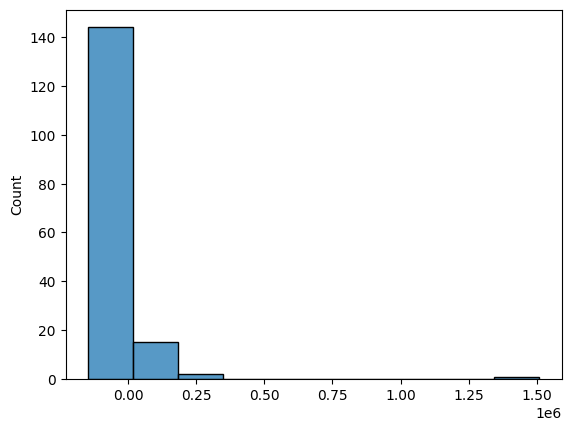

In [60]:
sns.histplot(lreg.coef_, bins=10)

In [61]:
lreg.intercept_

np.float64(-963014.614397599)

In [62]:
lreg.coef_

array([ 5.00606822e+02,  1.70773475e+02,  1.29393104e+03,  6.18723951e+03,
       -2.01845019e+01,  4.75881423e+02, -9.60102636e+00, -6.88081633e+04,
       -6.29907308e+04,  4.73507063e+04, -3.49590484e+04, -3.09536558e+04,
       -4.33104670e+04,  1.50937384e+06, -6.65388377e+04, -4.93157655e+04,
       -5.65794655e+04, -5.99438975e+04, -5.30942964e+04, -6.32352171e+04,
        1.07780933e+05, -1.56016400e+04, -6.35174943e+04, -6.60817883e+04,
       -6.14595554e+04, -4.78142449e+04, -5.69924340e+04, -7.22314721e+04,
       -5.47517342e+04,  1.69534113e+05, -5.84381186e+04, -6.25181091e+04,
       -6.60147886e+04, -3.70673211e+04, -1.47743198e+05,  2.72519221e+05,
       -6.06762531e+04,  7.58703792e+04, -5.82651559e+04, -6.30956024e+04,
       -5.03335851e+04, -7.20582442e+04, -6.58019757e+04, -6.54102975e+04,
       -2.92889532e+04,  3.56550825e+04, -6.63639493e+04, -6.92401622e+04,
        7.77361973e+04, -6.46081662e+04, -6.14596421e+04, -5.20940421e+04,
       -5.98039863e+04, -

In [63]:
# Wie viele Parameter haben wir?

df.shape

(11812, 163)